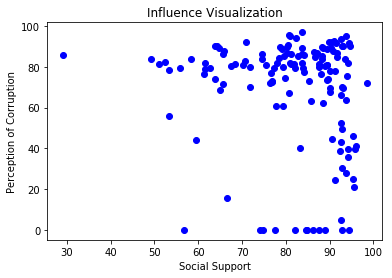

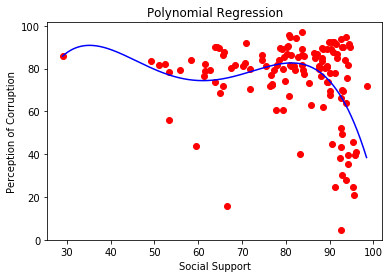

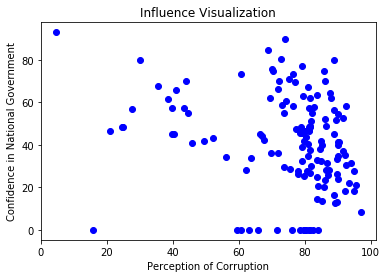

In [85]:
#Data retrieved from ourworldindata.org and databank.worldbank.org/data/home.aspx

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Step 1. Data Collection.

dataset1 = pd.read_csv('1CountriesSeries.csv', delimiter = ';', decimal = ',', encoding='latin-1')
dataset2 = pd.read_csv('2Indicators.csv', delimiter = ';', decimal = ',', encoding='latin-1')

dataset = dataset2.merge(dataset1, left_on = 'country', right_on = 'Country', how='left')
dataset = dataset.drop('Country', axis=1)

#Step 2. Data Preprocessing.

#KNN for missing values prediction in 'Freedom to Make Life Choices' column
dfFLC = dataset.drop(dataset.index[2])
dfFLC = dfFLC.drop(dfFLC.index[24])
dfFLC = dfFLC.drop(dfFLC.index[53])
xFLC = dfFLC.iloc[:, 5:6].values
yFLC = dfFLC.iloc[:, 6].values
from sklearn.neighbors import KNeighborsRegressor
regressor1 = KNeighborsRegressor(n_neighbors = 5, algorithm = 'auto', metric = 'minkowski', p = 2)
regressor1.fit(xFLC, yFLC)
yFLC_Algeria = regressor1.predict(74.815)
yFLC_China = regressor1.predict(74.1703)
yFLC_Iran = regressor1.predict(56.6281)
dataset.iloc[2, 6] = yFLC_Algeria
dataset.iloc[25, 6] = yFLC_China
dataset.iloc[55,6] = yFLC_Iran

#Polinomial Regression for missing values prediction in 'Perception of Corruption' column
plt.scatter(dataset.iloc[:, 5:6].values, dataset.iloc[:, 7].values, color = 'blue')
plt.title('Influence Visualization')
plt.xlabel('Social Support')
plt.ylabel('Perception of Corruption')
plt.show()
dfPC = dataset 
addvalues=[137, 134, 130, 127, 106, 71, 65, 61, 55, 25, 8, 2]

for b in addvalues:
    dfPC = dfPC.drop(dfPC.index[b])

xPC = dfPC.iloc[:, 5:6].values
yPC = dfPC.iloc[:, 7].values

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
xPC_poly = poly_reg.fit_transform(xPC)
poly_reg.fit(xPC_poly, yPC)
lin_reg = LinearRegression()
lin_reg.fit(xPC_poly, yPC)

#Visualisation of the results
xPC_grid = np.arange(min(xPC), max(xPC), 0.1)
xPC_grid = xPC_grid.reshape((len(xPC_grid), 1))
plt.scatter(xPC, yPC, color = 'red')
plt.plot(xPC_grid, lin_reg.predict(poly_reg.fit_transform(xPC_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Social Support')
plt.ylabel('Perception of Corruption')
plt.show()

#Adding predicted missing values 
for i in addvalues:
    dataset.iloc[i, 7] = lin_reg.predict(poly_reg.fit_transform(dataset.values[i, 5]))

#KNN for missing values prediction in 'Confidence in National Government' column
plt.scatter(dataset.iloc[:, 7:8].values, dataset.iloc[:, 8].values, color = 'blue')
plt.title('Influence Visualization')
plt.xlabel('Perception of Corruption')
plt.ylabel('Confidence in National Government')
plt.show()
dfCNG = dataset
droprows = [136, 134, 130, 127, 121, 106, 105, 86, 85, 71, 65, 61, 25, 19, 8, 2]
for r in droprows:
    dfCNG = dfCNG.drop(dfCNG.index[r])
xCNG = dfCNG.iloc[:, 7:8].values
yCNG = dfCNG.iloc[:, 8].values
from sklearn.neighbors import KNeighborsRegressor
regressor2 = KNeighborsRegressor(n_neighbors = 5, algorithm = 'auto', metric = 'minkowski', p = 2)
regressor2.fit(xCNG, yCNG)
for a in droprows:
    dataset.iloc[a, 8] = regressor2.predict(dataset.values[a, 7])



In [86]:
# Step 3. Choosing variables, that influence countries hapiness perception the most

#Backward Elimination using Multiple Linear Regression 
dsnew = dataset
droprows2 = [120, 96, 93, 64]
for p in droprows2:
    dsnew = dsnew.drop(dsnew.index[p])
dsnew = dsnew.drop('year', axis=1)
dsnew = dsnew.drop('Adjusted net national income per capita (current US$), 2015', axis=1)
dsnew = dsnew.drop('Literacy rate, adult total (% of people ages 15 and above), 2016', axis=1)
dsnew = dsnew.drop('Military expenditure (% of central government expenditure), 2015', axis=1)
dsnew = dsnew.drop('PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), 2015', axis=1)
dsnew = dsnew.drop('Refugee population by country or territory of origin, 2016', axis=1)
dsnew = dsnew.drop('Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age), 2015', axis=1)
dsnew = dsnew.drop('Urban population (% of total),2016', axis=1)

xBE = dsnew.iloc[:, 2:].values
y = dsnew.iloc[:, 1].values

import statsmodels.formula.api as sm
xBE = np.append(arr=np.ones((136,1)).astype(int), values = xBE, axis=1)
x = xBE[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [0, 1, 2, 3, 4, 5, 6, 8, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [0, 1, 3, 4, 5, 6, 8, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [0, 1, 3, 4, 5, 6, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())
x = xBE[:, [1, 3, 4, 5, 6, 12]]
regressorOLS=sm.OLS(endog=y, exog=x).fit()
print(regressorOLS.summary())

"""Log GDP per capita", "Social Support", "Freedom to Make Life Choices", "Perception of Corruption", 
"Confidence in National Government" and "Unemployment Rate" - variables that have the highest impact 
on countries Hapiness perception. Only this variables will be used for prediction model building.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     42.37
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           6.49e-38
Time:                        23:25:38   Log-Likelihood:                -101.14
No. Observations:                 136   AIC:                             228.3
Df Residuals:                     123   BIC:                             266.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8346      1.179     -1.556      0.1

In [114]:
# Step 4. Model Building and Evaluation.    
    
#Hapiness perception prediction using Random Forest Regressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

model = RandomForestRegressor(n_estimators = 1300, max_features = 'auto', oob_score = True, min_samples_leaf=2, 
                              warm_start = True, random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.around(y_pred, decimals = 2)
y_test = np.around (y_test, decimals = 2)
print ('Explained Variance Score: ', explained_variance_score(y_test, y_pred)) #Explained variance regression score function. Best possible score is 1.0, lower values are worse.
print ("Mean absolute error: ", mean_absolute_error(y_test, y_pred)) #Mean absolute error regression loss. The best value is 0.0
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pred)) #Mean squared logarithmic error regression loss. The best value is 0.0
print ("Median Absolute Error: ", median_absolute_error(y_test, y_pred)) #Median absolute error regression loss. The best value is 0.0
print ("R2 score: ", r2_score(y_test, y_pred)) #R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)


Explained Variance Score:  0.713619322826
Mean absolute error:  0.456071428571
Mean Squared Error:  0.367382142857
Median Absolute Error:  0.315
R2 score:  0.712204363283


In [140]:
#Hapiness perception prediction using Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(loss = 'huber', n_estimators = 1300, max_features = 'auto', min_samples_leaf=3, 
                              alpha = 0.1, warm_start = True, random_state = 42)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
y_pred = np.around(y_pred, decimals = 2)
y_test = np.around (y_test, decimals = 2)
print ('Explained Variance Score: ', explained_variance_score(y_test, y_pred)) #Explained variance regression score function. Best possible score is 1.0, lower values are worse.
print ("Mean absolute error: ", mean_absolute_error(y_test, y_pred)) #Mean absolute error regression loss. The best value is 0.0
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pred)) #Mean squared logarithmic error regression loss. The best value is 0.0
print ("Median Absolute Error: ", median_absolute_error(y_test, y_pred)) #Median absolute error regression loss. The best value is 0.0
print ("R2 score: ", r2_score(y_test, y_pred)) #R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)


Explained Variance Score:  0.798263099941
Mean absolute error:  0.429642857143
Mean Squared Error:  0.257760714286
Median Absolute Error:  0.405
R2 score:  0.798078348851


In [128]:
#Hapiness perception prediction using Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model2 = AdaBoostRegressor(n_estimators = 1300, random_state = 42)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
y_pred = np.around(y_pred, decimals = 2)
y_test = np.around (y_test, decimals = 2)
print ('Explained Variance Score: ', explained_variance_score(y_test, y_pred)) #Explained variance regression score function. Best possible score is 1.0, lower values are worse.
print ("Mean absolute error: ", mean_absolute_error(y_test, y_pred)) #Mean absolute error regression loss. The best value is 0.0
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pred)) #Mean squared logarithmic error regression loss. The best value is 0.0
print ("Median Absolute Error: ", median_absolute_error(y_test, y_pred)) #Median absolute error regression loss. The best value is 0.0
print ("R2 score: ", r2_score(y_test, y_pred)) #R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)


Explained Variance Score:  0.645401406466
Mean absolute error:  0.523571428571
Mean Squared Error:  0.453214285714
Median Absolute Error:  0.415
R2 score:  0.644966157277


In [ ]:
"""Out of 3 algorithms checked (Random Forrest Regression, Gradient Boosting Regression and Ada Boost Regression), 
the best scores of the Happiness perception predictions are based on Gradient Boosting Regression. 
Gradient Boosting Regression with parameters loss = 'huber', n_estimators = 1300, max_features = 'auto', 
min_samples_leaf=3, alpha = 0.1, warm_start = True, should be used for countries hapiness level predictions."""

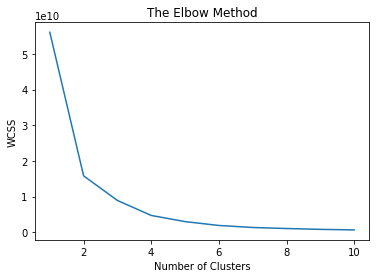

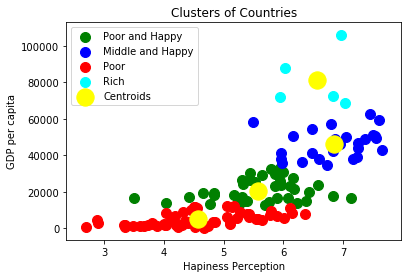

In [88]:
#Bonus Step. Data Visualisation of countries clustering into groups based the happiness perception level and GDP per capita.
    
#Countries Clustering using K-Means based on Hapiness Perception and GDP per capita
xcl = dsnew.iloc[:, [1, 8]].values

#Choose the number of clusters  
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init=10, random_state = 42)
    kmeans.fit(xcl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#K-means clustering and visualization
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(xcl)
plt.scatter(xcl[y_kmeans == 0, 0], xcl[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Poor and Happy')
plt.scatter(xcl[y_kmeans == 1, 0], xcl[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Middle and Happy')
plt.scatter(xcl[y_kmeans == 2, 0], xcl[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Poor')
plt.scatter(xcl[y_kmeans == 3, 0], xcl[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Rich')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Countries')
plt.xlabel('Hapiness Perception')
plt.ylabel('GDP per capita')
plt.legend()
plt.show()
